## ei_runner.ipynb 
A basic script to run excitatory-inhibitory (EI) networks using the `ei_net` class imported from ei_net.py .  
By Sergio Verduzco  
December 2017

In [1]:
# importing libraries
%cd ..
from ei_net import *

/home/z/projects/draculab


In [ ]:
# This is the name of the file where logging will happen
#log_file = "/home/z/projects/draculab/logs/ei_net_log" + time.strftime("_%m-%d-%y.txt")
log_file = "./logs/ei_net_log" + time.strftime("_%m-%d-%y.txt")

In [ ]:
%%capture capt 
# logging draculab version used for this session
print('#======================================================')
print('#             | Latest git commit: |')
print('#====================================================== \n#', end=' ')
!git log -1 --oneline --color=never

In [ ]:
# Write the output of the cell above in the simulation log
f = open(log_file, mode='a')
f.write(capt.stdout)
f.close()

In [7]:
# Runner configuration
ei_runner = ei_net()
#----------------------------------
ei_runner.annotate("Adjusting size of e,i groups.")
ei_runner.set_param('e_geom', 'rows', 16)
ei_runner.set_param('e_geom', 'columns', 16)
ei_runner.set_param('i_geom', 'rows', 8)
ei_runner.set_param('i_geom', 'columns', 8)
#ei_runner.annotate("Compensating for the reduced number of inhibitory units.")
ei_runner.set_param('ee_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
ei_runner.set_param('ei_conn', 'weights',{'uniform' : {'low': .01, 'high' : 0.3}})
ei_runner.set_param('ie_conn', 'weights',{'uniform' : {'low': -1.2, 'high' : -0.01}})
ei_runner.set_param('ii_conn', 'weights',{'uniform' : {'low': -1., 'high' : -0.01}})
#----------------------------------
ei_runner.annotate("Setting input parameters")
ei_runner.set_param('x_geom', 'rows', 3) 
ei_runner.set_param('x_geom', 'columns', 3) 
ei_runner.set_param('xe_conn', 'weights', {'uniform' : {'low': 0.01, 'high' : 5.}})
ei_runner.set_param('xi_conn', 'weights', {'uniform' : {'low': 0.01, 'high' : 0.1}})
#----------------------------------
"""
ei_runner.annotate('Using exp_rate_dist ee synapses.')
ei_runner.set_param('ee_syn', 'type', synapse_types.exp_rate_dist)
ei_runner.set_param('ee_syn', 'lrate', 1.)
ei_runner.set_param('ee_syn', 'wshift', 10.)
ei_runner.set_param('ee_syn', 'c', 2.)
"""
#----------------------------------
"""
ei_runner.annotate("Using exp_dist_sig units for the excitatory population.")
ei_runner.set_param('e_pars', 'type', unit_types.exp_dist_sig)
ei_runner.set_param('e_pars', 'tau_scale', 0.02)
ei_runner.set_param('e_pars', 'c', 3.)
ei_runner.set_param('e_pars', 'Kp', .05)

ei_runner.annotate("Using exp_dist_sig units for the inhibitory population.")
ei_runner.set_param('i_pars', 'type', unit_types.exp_dist_sig)
ei_runner.set_param('i_pars', 'tau_scale', 0.02)
ei_runner.set_param('i_pars', 'c', 3.)
ei_runner.set_param('i_pars', 'Kp', .05)
"""
#----------------------------------

ei_runner.annotate("Using exp_dist_sig_thr units for the excitatory population.")
ei_runner.set_param('e_pars', 'type', unit_types.exp_dist_sig_thr)
ei_runner.set_param('e_pars', 'tau_thr', 0.001)
ei_runner.set_param('e_pars', 'c', 3.)

ei_runner.annotate("Using exp_dist_sig_thr units for the inhibitory population.")
ei_runner.set_param('i_pars', 'type', unit_types.exp_dist_sig_thr)
ei_runner.set_param('i_pars', 'tau_scale', 0.001)
ei_runner.set_param('i_pars', 'c', 3.)

#----------------------------------
ei_runner.set_param('n', 'w_track', 16)
#----------------------------------
ei_runner.build()

In [ ]:
# Simulating
n_pres = 4
pres_time = 1.
ei_runner.run(n_pres, pres_time)

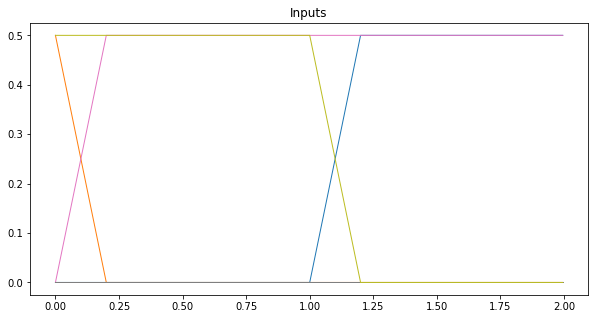

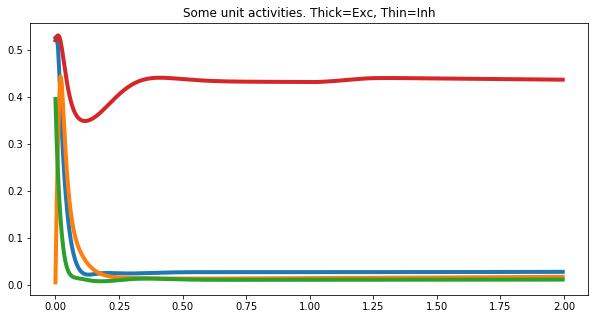

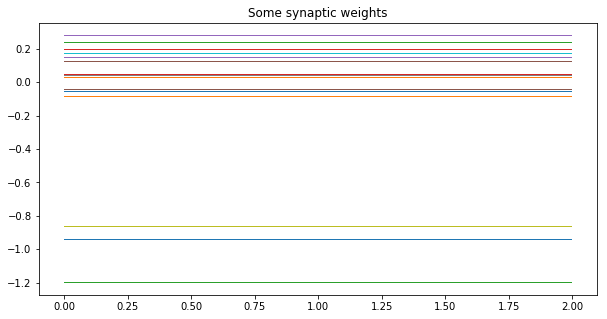

In [4]:
%matplotlib inline
ei_runner.basic_plot()

In [6]:
ei_runner.double_anim(ei_runner.e, slider=False, interv=20, nbins=20, pdf=True)

In [ ]:
# Plot the highest excitatory unit activities
%matplotlib inline
n_top = 5  # how many units to plot
top_pop = np.array(ei_runner.e)  # population to visualize
top_units = ei_runner.all_activs[top_pop].sum(1).argpartition(-n_top)[-n_top:]
print(top_units)
top_act_fig = plt.figure(figsize=(18,8))
top_acts = ei_runner.all_activs[top_pop[top_units]].transpose()
plt.plot(ei_runner.all_times, top_acts)
plt.show()

In [ ]:
# Plot the lowest excitatory unit activities
n_bottom = 60  # how many units to plot
bottom_pop = np.array(ei_runner.e)  # population to visualize
bottom_units = ei_runner.all_activs[bottom_pop].sum(1).argpartition(n_bottom)[0:n_bottom-1]
print(bottom_units)
bottom_act_fig = plt.figure(figsize=(18,8))
bottom_acts = ei_runner.all_activs[bottom_pop[bottom_units]].transpose()
plt.plot(ei_runner.all_times, bottom_acts)
plt.show()

In [ ]:
ei_runner.history

In [ ]:
ei_runner.conn_anim(ei_runner.i, ei_runner.e, slider=True, weights=True)

In [ ]:
ei_runner.act_anim(ei_runner.e, 0.9, interv=20, slider=True)

In [ ]:
ei_runner.hist_anim(ei_runner.e, slider=True, nbins=20, pdf=True)

In [ ]:
# Some code to visualize the shape of the learning rule
f = lambda x: np.log( x/(1.-x) )
x = np.linspace(0.005, 0.99, 200)
#plt.plot(x, f(x))
y = np.linspace(0.005, 0.99, 200)
x,y = np.meshgrid(x,y)
k = np.exp(1.)/(1. - np.exp(-1))
#z = 0.1*f(x)*np.exp(y)/(y*(y-1))
z =  k * x * np.exp(y)/(144.*y*(1.-y))
%matplotlib qt5
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, rcount=60, ccount=60, antialiased=False)
ax.set_xlabel('post rate')
ax.set_ylabel('pre rate')
ax.set_zlabel('ss weight')
plt.show()

In [ ]:
time.strftime("_%x.txt")